In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from pyopls import OPLS
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict

output_directory = '/home/marco/DataspellProjects/thesis/output/opls/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

df = pd.read_csv('../../data/ST001937_AN003150.csv')

df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
#dropiing phenotype where = Health Control
df.drop(df[df.Phenotypes == 'Health Control'].index, inplace=True)
df['Phenotypes'] = df['Phenotypes'].map({'Maligant SPNS': 1, 'Benign SPNS': 0})

df.dropna(inplace=True)
df.describe()

,Phenotypes,"1,3,5(10)-estratrien-3,6- beta-17-beta-triol","1,5-anhydroglucitol",17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-1,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-2,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-3,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-4,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-5,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-6,1-hexadecanol,...,tyrosine-1,tyrosine-2,urea-1,urea-2,urea-3,urea-4,uridine,valine,xanthine,xanthosine
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.821591,1.012762,0.729192,0.992516,0.831932,1.015192,0.668489,0.976064,0.923902,0.971448,...,1.001676,0.998886,0.999121,1.003204,1.008805,1.058643,1.919740,1.009282,1.187984,1.058678
std,0.383074,4.025911,1.848178,0.847913,1.900083,1.284892,13.205688,0.994366,0.900041,0.545010,...,0.838160,0.670856,0.673445,0.779703,0.615621,3.123692,18.444169,3.518076,3.830306,1.504268
min,0.000000,-39.450819,-15.302208,0.041816,-4.347259,0.020405,-215.131930,0.000001,0.019746,0.029220,...,0.058795,0.010670,0.000000,0.000000,0.000139,0.014105,-22.231170,-23.009451,0.009951,0.007223
25%,1.000000,0.058466,0.406343,0.583650,0.042061,0.129595,0.300879,0.466022,0.467343,0.742269,...,0.667721,0.665263,0.652324,0.529166,0.667603,0.076763,0.008018,0.150802,0.261765,0.117131
50%,1.000000,0.155395,0.653270,0.807328,0.254511,0.729099,0.777375,0.787170,0.738193,0.919759,...,0.876659,0.924768,0.929857,0.894458,0.933160,0.143234,0.085349,0.348848,0.543469,0.507749
75%,1.000000,0.506063,0.930212,1.152998,0.916468,1.503850,1.252913,1.228167,1.154701,1.075797,...,1.128797,1.229246,1.230535,1.340115,1.212497,0.361870,0.363870,0.755963,1.067006,1.494840
max,1.000000,42.210125,40.665768,11.641053,24.195725,15.805307,239.561563,19.882009,13.956629,8.076066,...,16.206260,11.647518,10.149729,13.078118,10.244206,48.041776,428.787832,63.207003,84.958222,16.217098


In [5]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold

X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
opls = OPLS(5)
Z = opls.fit_transform(X, y)
pls = PLSRegression(1)

# Cross-validated predictions
y_pred = cross_val_predict(pls, Z, y, cv=cv, method='predict')

# Calculate ROC curve and ROC AUC score
fpr, tpr, _ = roc_curve(y_true=y, y_score=y_pred)
roc_auc = auc(fpr, tpr)


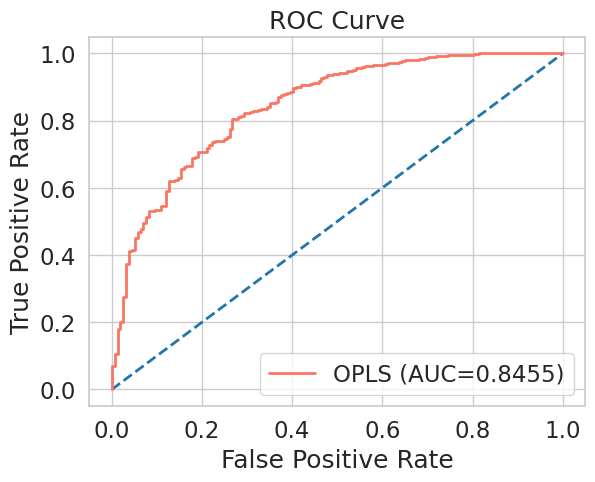

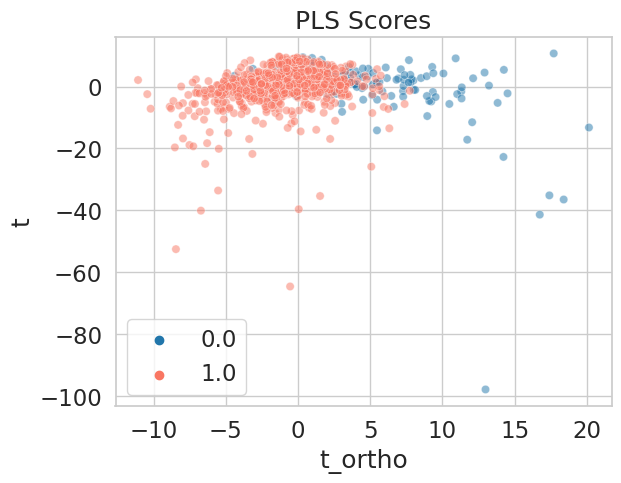

In [6]:

plt.figure(0)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.plot(fpr, tpr, lw=2, label=f'OPLS (AUC={roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(1)
pls.fit(Z, y)
df = pd.DataFrame(np.column_stack([pls.x_scores_, opls.T_ortho_[:, 0]]),index=X.index, columns=['t', 't_ortho'])
sns.scatterplot(x='t', y='t_ortho', hue=y, data=df, alpha=0.5, markers=['o', '^'])
plt.title('PLS Scores')
plt.xlabel('t_ortho')
plt.ylabel('t')
plt.legend(loc='lower left')

plt.show()
